<a href="https://colab.research.google.com/github/EddyGiusepe/Spam_classifier_using_Python/blob/main/spam_classification_ML_End_to_End_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam classification Machine Learning | End-to-End Deployment | spam classifier using Python

Data Scientist Jr.: Dr.Eddy Giusepe Chirinos Isidro


Here I will study how to build and implement ``end-to-end`` Spam Classification Model using NLP Machine Learning. I will study and show you how to create a WORD CLOUD in this tutorial.


Here, too, we will learn how to create, use Machine Learning Model Pickle file. 


This study was based on the following links:

* [Spam classifier using Python](https://www.youtube.com/watch?v=inp6h0HDN74&list=PLlUZLZydkS79ctBEkAqeNj5k0RNvAvvD7&index=6).

* [Automated spam e-mail detection model | using commom NLP tasks](https://www.analyticsvidhya.com/blog/2021/06/automated-spam-e-mail-detection-modelusing-common-nlp-tasks/)

## Importamos as nossas bibliotecas

In [1]:
import pandas as pd
import numpy as np
import pickle
import nltk
import re
import csv

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import accuracy_score, fbeta_score, classification_report
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
ss = SnowballStemmer('english')
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Carregamos nossos Dados

In [109]:
# Carregando nossos Dados

# with open('/content/drive/MyDrive/3_EDDY_ISH_TECNOLOGIA/4_ML_inside_of _MANTIS/Spam_classification_ML/spam.csv', mode='r', encoding='ISO-8859-1') as arquivo:
#   arquivo_csv = csv.reader(arquivo, delimiter=',')
#   linhas = 0
#   for coluna in arquivo_csv:
#     if linhas == 0:
#       print(f'Colunas:  {" ".join(coluna)}')
#       linhas += 1
#     else:
#       print(f'\t{coluna[0]} é o {coluna[1]}')
#       linhas += 1 

#   print(f'lidas {linhas} linhas.')      




In [2]:
# Ver vídeo para ler um arquivo .csv --> https://www.youtube.com/watch?v=K1RLuCp_LvI

msg_df = pd.read_csv('/content/drive/MyDrive/3_EDDY_ISH_TECNOLOGIA/4_ML_inside_of _MANTIS/Spam_classification_ML/spam.csv',
                     sep=',', encoding='ISO-8859-1', header=0, usecols=['class', 'message'])

msg_df.head(20)
#display(msg_df)

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
msg_df.shape

(5572, 2)

In [4]:
# stop words

stop;

In [9]:
# Guia de como trocar os nomes da coluna --> https://www.youtube.com/watch?v=k_C5szI5V7Q
# Aqui vamos a trocar o nome da primeira coluna

msg_df.rename(columns={'class': 'label'}, inplace=True)

In [10]:
msg_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
msg_df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
# Também --> msg_df.groupby('label').describe().T

msg_df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [18]:
msg_df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

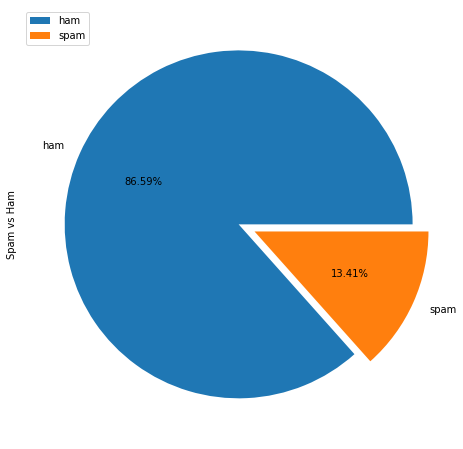

In [35]:
msg_df['label'].value_counts().plot(kind='pie', explode=[0, 0.1], figsize=(8, 8), autopct= '%1.2f%%')
plt.ylabel('Spam vs Ham')
plt.legend(loc='upper left')
plt.show()


In [37]:
msg_df.groupby('message')['label'].agg([len, np.max]).sort_values(by='len', ascending=False).head(10)

,len,amax
message,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


In [38]:
# length --> tamnho de carateres em cada message

msg_df['length'] = msg_df['message'].apply(len)
msg_df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
msg_df.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [46]:
# Aqui vamos a visualizar a mensagem que tem o máximo de caracteres

msg_df[msg_df['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd2d90e390>,
      dtype=object)

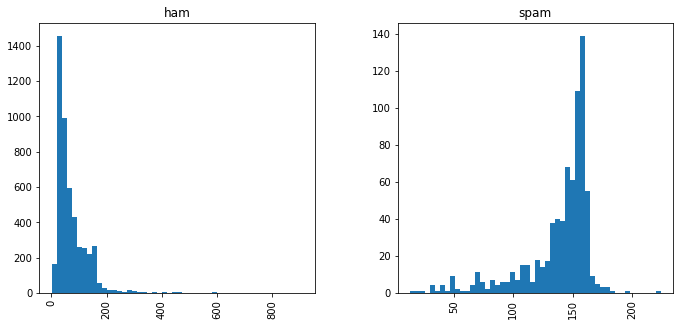

In [47]:

msg_df.hist(column='length', by='label', bins=50, figsize=(11, 5))

# OBS:
# Looks like the lengthy is the message, more likely it is a spam. Let's not forget this.

# Text Transformation


Data cleaning --> Removing unimportant data/Stopwords/Stemming

In [48]:
msg_df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [50]:
import string

def cleanText(message):
  message = re.sub('[^a-zA-Z]', ' ', message)
  message = message.lower()
  message = message.split()
  words = [ss.stem(word) for word in message if word not in stop]

  return " ".join(words)


In [54]:
# Verificamos a nossa função anterior:

cleanText(":) I LOVE you, my God!")

'love god'

In [56]:
# Aplicamos a limpeza a nossa coluna message

msg_df['message'] = msg_df['message'].apply(cleanText)

# Logo visualizamos nossos Dados

msg_df.head(6)

,label,message,length
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri wkli comp win fa cup final tkts st ...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah think goe usf live around though,61
5,spam,freemsg hey darl week word back like fun still...,148


In [57]:
# Aqui vamos a separar nossas messages de Spam e messages de Ham

spam_messages = msg_df[msg_df['label'] == 'spam']['message']

ham_messages = msg_df[msg_df['label'] == 'ham']['message']

In [62]:
spam_messages

2       free entri wkli comp win fa cup final tkts st ...
5       freemsg hey darl week word back like fun still...
8       winner valu network custom select receivea pri...
9       mobil month u r entitl updat latest colour mob...
11      six chanc win cash pound txt csh send cost p d...
                              ...                        
5537    want explicit sex sec ring cost p min gsex pob...
5540    ask mobil chatlin inclu free min india cust se...
5547    contract mobil mnths latest motorola nokia etc...
5566    remind get pound free call credit detail great...
5567    nd time tri contact u u pound prize claim easi...
Name: message, Length: 747, dtype: object

In [63]:
ham_messages

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: message, Length: 4825, dtype: object